In [5]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
#import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

In [7]:
# CONNECT TO POSTGRES
USERNAME = "postgres"
PASSWORD = "postgres"
HOST = "localhost"
PORT = 5432
DATABASE = "CrowdFunding_db"
connection_str = f"postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"

# Create Engine
engine = create_engine(connection_str)

In [69]:
query = "SELECT con.last_name, con.email, SUM(can.pledged) AS total_pledged FROM Contacts con JOIN Campaign can ON con.contact_id = can.contact_id WHERE can.pledged > 10000 GROUP BY con.last_name, con.email limit 10;"
df = pd.read_sql_query(query, engine)

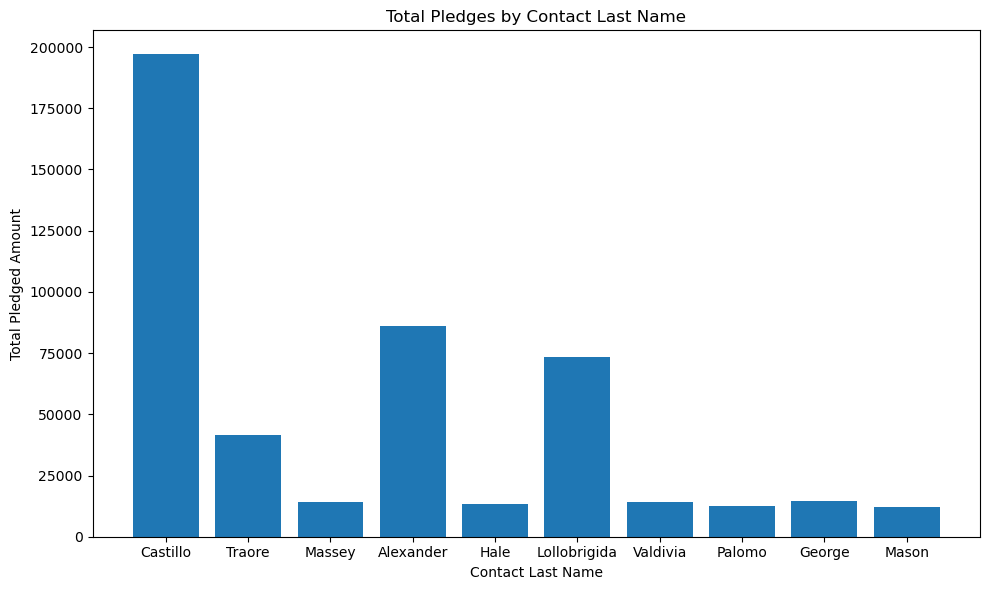

In [75]:
# Scatter plot to visualize total pledges per contact
plt.figure(figsize=(10, 6))
# Adjust figure size for better visualization
plt.bar(df['last_name'], df['total_pledged']) 
plt.xlabel('Contact Last Name')
plt.ylabel('Total Pledged Amount')
plt.title('Total Pledges by Contact Last Name')
#plt.grid(True)  
plt.tight_layout() 
plt.show()


In [49]:
query= "SELECT con.Email FROM Contacts con JOIN Campaign can ON con.contact_id = can.contact_id WHERE can.backers_count = 0 GROUP BY con.Email;"
df = pd.read_sql_query(query, engine)


In [53]:
query = "SELECT c.company_name, c.description, c.outcome, c.goal FROM Campaign c  WHERE c.outcome = 'failed' AND c.goal > 10000;"
df = pd.read_sql_query(query, engine)

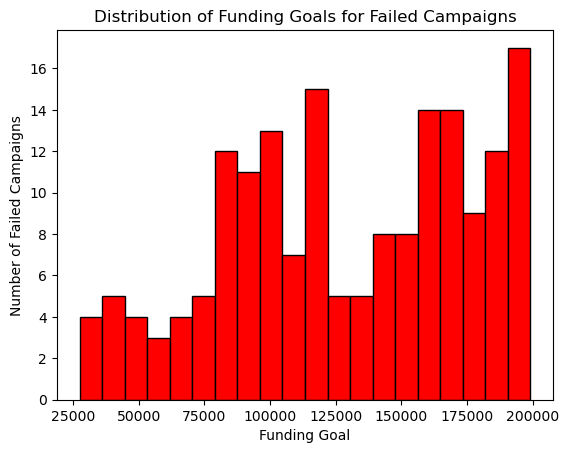

In [39]:
query = """ SELECT c.company_name, c.description, c.outcome, c.goal FROM Campaign c WHERE c.outcome = 'failed' AND c.goal > 10000; """ 
df = pd.read_sql_query(query, engine) 

#Create a histogram of failed campaign goals 
plt.hist(df['goal'], bins=20, color='red', edgecolor='black') 
plt.xlabel('Funding Goal') 
plt.ylabel('Number of Failed Campaigns') 
plt.title('Distribution of Funding Goals for Failed Campaigns') 
plt.show()